### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import re
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Reading the dataset

In [2]:
data = pd.read_csv(r'E:\Sentiment Analysis\sentiment\dataset.csv',encoding = 'utf-8')

In [3]:
data.head()

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


In [4]:
data.columns

Index(['Text', 'Language', 'Label'], dtype='object')

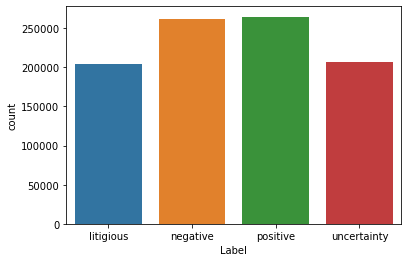

In [5]:
sns.countplot(data['Label'])

In [6]:
data["Label"].unique()

array(['litigious', 'negative', 'positive', 'uncertainty'], dtype=object)

In [7]:
data.shape

(937854, 3)

### Cleaning the data

In [8]:
# Final Function to clean tweets
def remove_emoji(string):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)

def clean_tweets(tweet):
    if type(tweet)==np.float:
        return ''
    
    tweet = tweet.lower()
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("#","", tweet)
    tweet = re.sub(r'https?:\/\/\S+','',tweet)
    tweet =  re.sub(r'RT[\s]+','',tweet)
    tweet = remove_emoji(tweet)
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    
    
    return tweet

data['Text'] = data["Text"].apply(clean_tweets)

<ipython-input-8-6b644176c028>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet)==np.float:


In [9]:
data.head()

,Text,Language,Label
0,"testimony is not evidence in a court of law, s...",en,litigious
1,badbunny: como dos gotas de agua: joven se dis...,es,negative
2,flagstar bank discloses a data breach that imp...,en,litigious
3,rwanda is set to host the headquarters of unit...,en,positive
4,oops. i typed her name incorrectly (today’s br...,en,litigious


In [10]:
# REMOVING STOPWORDS
stopword = stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text) 
    return text
data['Text'] = data["Text"].apply(remove_stopwords)

In [11]:
data.drop(["Language"],axis = 1,inplace = True)

In [12]:
data.head()

,Text,Label
0,"testimony evidence court law, state federal. m...",litigious
1,badbunny: como dos gotas de agua: joven se dis...,negative
2,flagstar bank discloses data breach impacted 1...,litigious
3,rwanda set host headquarters united nations de...,positive
4,oops. typed name incorrectly (today’s brave wi...,litigious


### Plotting word cloud

In [13]:
data_litigious = data.loc[data['Label']=='litigious'].reset_index(drop=True)
data_litigious.head()

,Text,Label
0,"testimony evidence court law, state federal. m...",litigious
1,flagstar bank discloses data breach impacted 1...,litigious
2,oops. typed name incorrectly (today’s brave wi...,litigious
3,"[when first sign surrender comes, michael’s sm...",litigious
4,"""it's fight save uk liars, cheats &amp; charla...",litigious


In [14]:
data_negative = data.loc[data['Label']=='negative'].reset_index(drop=True)
data_negative.head()

,Text,Label
0,badbunny: como dos gotas de agua: joven se dis...,negative
1,sucks since i'm focused nature aspect things e...,negative
2,treballar l’obra partir dels 19 anys fins als ...,negative
3,social security. constant political crises dis...,negative
4,broken rib puncture lung lead collapsed lung. ...,negative


In [15]:
data_positive = data.loc[data['Label']=='positive'].reset_index(drop=True)
data_positive.head()

,Text,Label
0,rwanda set host headquarters united nations de...,positive
1,wimbledon: nick kyrgios admits spitting toward...,positive
2,booktwt thing? thats speaks perfect grammar sp...,positive
3,end consume fictional stories enjoy seem fair....,positive
4,duranto express a1 coach ac working properly 1...,positive


In [16]:
data_uncertainty = data.loc[data['Label']=='uncertainty'].reset_index(drop=True)
data_uncertainty

,Text,Label
0,also relate art too!!! lot people dismayed sta...,uncertainty
1,j'espere que ça passera le plus vite possible :/,uncertainty
2,ew almost valentine’s day,uncertainty
3,i’m thinking maybe ironwood told robyn plan lu...,uncertainty
4,"infinite diversity infinite combinations, mean...",uncertainty
...,...,...
206935,bag cheese hidden somewhere house... ain’t ta...,uncertainty
206936,that’s hellz nah me. 🤢. maybe fries,uncertainty
206937,el mizouni roles team could really good. colin...,uncertainty
206938,don’t take risks you’ll always end working som...,uncertainty


### Word Cloud for positve data
Words = " ".join([tweet for tweet in data_positive['Text']])
wordCloud = WordCloud(width = 800,height = 800,background_color ='white',max_font_size = 119).generate(Words)

plt.imshow(wordCloud)
plt.axis('off')
plt.title('POSITIVE WORDS')
plt.show()

In [17]:
# plot Word Cloud
def wordClouds(words):
    Words = " ".join([text for text in words])
    wordCloud = WordCloud(width = 800,height = 800,background_color ='white',max_font_size = 119).generate(Words)
    return wordCloud
    

dict_keys(['s', 'perfect', 'incredible', 'dream', 'amp', 'best', 'one', 'good', 'think', 'people', 'know', 'love', 'excited', 'u', 'time', 'make', 'work', 'need', 'innovation', 'don t', 'thank', 'today', 'see', 'want', 'new', 'day', 'even', 'game', 'team', 'right', 'well', 'still', 'm', 'look', 'got', 'year', 'go', 'good morning', 'better', 'great', 'much easier', 'way', 'thing', 'say', 'improve', 'alway', 'm excited', 'life', 'going', 'world', 'made', 're', 'take', 'first', 'much', 'back', 'feel', 'guy', 'hope', 'use', 'really', 'live', 'something', 'mean', 'show', 'help', 'read', 'man', 'lol', 'now', 'play', 'come', 'lot', 'ye', 'support', 'never', 'many', 'everything', 'everyone', 'learn', 'give', 'find', 'friend', 'excited see', 'someone', 'keep', 'thought', 'sweet dream', 'sure', 'said', 'getting', 'amazing', 'making', 'start', 'maybe', 'kid', 'easier', 'change', 'though', 'part', 'let', 've', 'project', 'player', 'week', 'actually', 'd', 'point', 'person', 'without', 'little', 'm

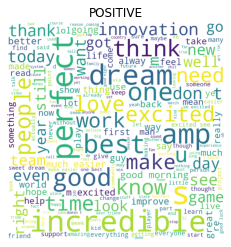

In [18]:
pos_wordcloud = wordClouds(data_positive['Text'])
print(pos_wordcloud.words_.keys())

plt.imshow(pos_wordcloud)
plt.axis('off')
plt.title('POSITIVE')
plt.show()

### Word Cloud for negative data

dict_keys(['s', 'problem', 'one', 'bad', 'amp', 'lost', 'wrong', 'broken', 'think', 'question', 'people', 'don t', 'poor', 'know', 'u', 'accident', 'even', 'say', 'need', 'time', 'right', 'still', 'flawed', 'want', 'see', 'make', 'way', 'thing', 'said', 'got', 'well', 'good', 'm', 'mean', 're', 'love', 'look', 'much', 'never', 'someone', 'work', 'today', 'day', 'life', 'trump', 'alway', 'something', 'lol', 'really', 'man', 'come', 'game', 'ye', 'year', 'take', 'going', 'point', 'guy', 'new', 'better', 'actually', 'made', 'back', 'maybe', 'show', 'kid', 'feel', 'go', 'didn t', 'thought', 'lot', 'everyone', 'shit', 'now', 'many', 'saying', 'seem', 'hope', 'fact', 'country', 'doesn t', 'live', 'person', 'state', 'help', 'believe', 'use', 'world', 'nothing', 'anyone', 'give', 'women', 'issue', 'keep', 'everything', 'sure', 'first', 'put', 'part', 'yeah', 'thank', 'tell', 'cause', 'another', 'great', 'without', 'call', 'friend', 'case', 'god', 'used', 'yet', 'team', 'already', 'reason', 'le

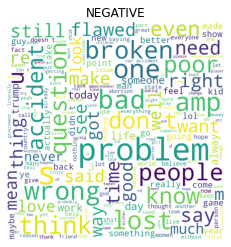

In [19]:
neg_wordcloud = wordClouds(data_negative['Text'])
print(neg_wordcloud.words_.keys())

plt.imshow(neg_wordcloud)
plt.axis('off')
plt.title('NEGATIVE')
plt.show()

### Word Cloud for uncertain data

dict_keys(['maybe', 'probably', 's', 'somewhere', 'possible', 'might', 'one', 'amp', 'almost', 'think', 'know', 'people', 'u', 'time', 'don t', 'see', 'risk', 'thing', 'need', 'say', 'still', 'work', 'm', 'make', 'look', 'even', 'right', 'something', 'love', 'well', 'way', 'day', 'much', 'said', 'good', 'got', 'mean', 'new', 'want', 'game', 'really', 'lol', 'going', 'today', 'someone', 'back', 're', 'trump', 'better', 'come', 'go', 'year', 'guy', 'feel', 'put', 'show', 'alway', 'thank', 'take', 'use', 'point', 'sure', 'first', 'lot', 'life', 'actually', 'man', 'many', 'help', 'thought', 'hope', 'though', 'made', 'great', 'ye', 'never', 'seem', 'shit', 'team', 'live', 'may', 'keep', 'find', 'll', 'play', 'let', 'd', 'little', 'now', 've', 'friend', 'anything', 'yeah', 'another', 'kid', 'world', 'getting', 'person', 'try', 'give', 'part', 'read', 'everyone', 'didn t', 'already', 'least', 'call', 'used', 'cause', 'done', 'believe', 'without', 'job', 'place', 'anyone', 'bad', 'yet', 'big',

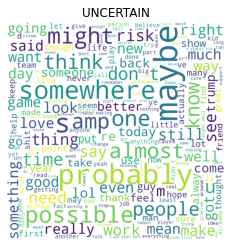

In [20]:
un_wordcloud = wordClouds(data_uncertainty['Text'])
print(un_wordcloud.words_.keys())

plt.imshow(un_wordcloud)
plt.axis('off')
plt.title('UNCERTAIN')
plt.show()

### Word Cloud for litigious data

dict_keys(['s', 'amp', 'contract', 'one', 'criminal', 'law', 'settlement', 'think', 'people', 'know', 'witness tampering', 'u', 'need', 'say', 'even', 'don t', 'right', 'want', 'time', 'breach', 'witness', 'said', 'see', 'still', 'make', 'new', 'legal', 'case', 'way', 'thing', 'state', 'trump', 'security breach', 'mean', 'well', 'got', 'data breach', 'work', 'going', 'take', 'good', 'government', 'someone', 'come', 'look', 'day', 'today', 're', 'much', 'never', 'ye', 'go', 'now', 'may', 'first', 'didn t', 'team', 'something', 'made', 'use', 'point', 'country', 'back', 'e', 'nothing', 'via', 'really', 'fact', 'guy', 'give', 'money', 'many', 'm', 'believe', 'man', 'part', 'maybe', 'actually', 'support', 'better', 'without', 'call', 'must', 'seem', 'live', 'lawyer', 'cassidy hutchinson', 'person', 'let', 'year', 'put', 'anyone', 'another', 'hope', 'lol', 'doesn t', 'already', 'saying', 'show', 'sure', 'job', 'keep', 'help', 'alway', 'crime', 'law enforcement', 'isn t', 'women', 'issue', '

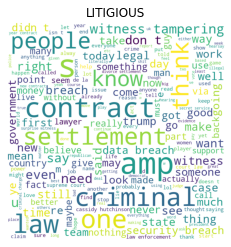

In [21]:
lit_wordcloud = wordClouds(data_litigious['Text'])
print(lit_wordcloud.words_.keys())

plt.imshow(lit_wordcloud)
plt.axis('off')
plt.title('LITIGIOUS')
plt.show()

### Mapping the Labels

* litigious - 0
* negaive - 1
* positive - 2
* uncertainty - 3

In [22]:
data.Label.unique()

array(['litigious', 'negative', 'positive', 'uncertainty'], dtype=object)

In [23]:
data['Label'] = data['Label'].map({"litigious":0,'negative':1,'positive':2,'uncertainty':3})

In [74]:
data['Label'].head()

0    0
1    1
2    0
3    2
4    0
Name: Label, dtype: int64

### BUILDING MODEL USING LSTM

In [25]:
# Train Test Split
X = data['Text']
y = data['Label']

Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# defining Params

embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding = 'post'
oov_token = '</oov>'

### Tokenizer and padding

In [28]:
# intitlaising tokenizer
tokenizer = Tokenizer(oov_token=oov_token)

# fitting the tokenizer on data
tokenizer.fit_on_texts(X_train)

# the word_index dictionary
word_index = tokenizer.word_index

# convertin into sequences
sequences = tokenizer.texts_to_sequences(X_train)

# padding the sequences
X_train_pad = pad_sequences(sequences,maxlen = max_length,truncating=trunc_type,padding=padding)

In [211]:
X_train.to_csv('X_train.csv')

In [30]:
vocab_size=len(word_index)

In [69]:
# handling testing sequences
testing_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(testing_seq,maxlen = max_length,padding = 'post',truncating=trunc_type)

In [32]:
X_train_pad

array([[  2122,    588,     34, ...,      0,      0,      0],
       [    31,   5323,   1638, ...,      0,      0,      0],
       [    20,    715,   1591, ...,      0,      0,      0],
       ...,
       [   425,     84,      0, ...,      0,      0,      0],
       [   999, 118865,   4492, ...,      0,      0,      0],
       [  3988, 368664,    826, ...,      0,      0,      0]])

### Using GloVe Embeddings for the model

In [33]:
# Define path to file containing the embeddings
GLOVE_FILE = 'E:/Sentiment Analysis/glove.twitter.27B/glove.twitter.27B.100d.txt'

# Initialize an empty embeddings index dictionary
GLOVE_EMBEDDINGS = {}

# Read file and fill GLOVE_EMBEDDINGS with its contents
with open(GLOVE_FILE,encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

In [34]:
test_word = 'contract'

test_vector = GLOVE_EMBEDDINGS[test_word]

print(f"Vector representation of word {test_word} looks like this:\n\n{test_vector}")

Vector representation of word contract looks like this:

[-2.7810e-02  4.8643e-01  3.0146e-01 -3.3062e-01 -7.8305e-01 -8.4307e-01
 -8.1151e-01 -4.6621e-01 -7.4424e-01 -2.0578e-01  1.1839e+00  6.1356e-02
 -2.7558e+00  7.4858e-01  2.8473e-01 -3.3352e-01 -4.3420e-01  1.5785e+00
 -3.2831e-01 -6.3464e-01 -4.2761e-02  5.3740e-01  5.6784e-01  1.5918e-01
  6.9295e-02  7.3183e-01  7.8032e-01  3.6132e-01 -8.0194e-01 -3.0675e-01
  4.2610e-01  6.3847e-01 -8.1685e-01 -7.0533e-01  5.8659e-01  2.2128e-01
  1.0886e-01  1.3992e-01  4.6859e-01 -8.7770e-01 -4.9728e-02  4.9114e-01
  2.7652e-01 -2.3913e-01 -6.8747e-02 -2.6312e-01  3.1172e-02 -6.1214e-01
  4.1109e-01  9.1846e-01  4.8464e-01  7.6501e-01 -7.2315e-01  3.5191e-01
 -2.9566e-01  9.6873e-01  3.1025e-01 -3.0282e-01 -5.5041e-01  5.4454e-01
 -1.4272e-02 -2.4463e-01 -9.7565e-02  2.1276e-01  7.1729e-01  1.8475e-01
  1.1148e-01 -4.6604e-01  7.2152e-01 -3.6854e-01 -9.5756e-03 -1.7620e-01
  7.6025e-01  7.9747e-01  2.4633e-01 -3.5365e-01 -3.9770e-01 -2.266

In [35]:
# Initialize an empty numpy array with the appropriate size
EMBEDDINGS_MATRIX = np.zeros((vocab_size+1, embedding_dim))

# Iterate all of the words in the vocabulary and if the vector representation for 
# each word exists within GloVe's representations, save it in the EMBEDDINGS_MATRIX array
for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector

In [177]:
EMBEDDINGS_MATRIX

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.21063   , -0.010992  , -0.17552   , ..., -0.37547001,
         0.58029002,  0.16067   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.12301   ,  0.017242  , -0.27188   , ..., -0.51554   ,
        -0.84351999,  0.3407    ]])

### Creating the Model

In [53]:
## create model

def create_model(vocab_size,embedding_dim,max_length,embeddings_matrix):
    model = tf.keras.Sequential([
        Embedding(vocab_size+1,embedding_dim,input_length=max_length, weights=[embeddings_matrix], trainable=False),
        tf.keras.layers.Dropout(0.2),
        Bidirectional(LSTM(32)),
        #Dense(64,activation='relu'),
        Dense(4,activation='softmax')        
    ])
    return model

In [54]:
model = create_model(vocab_size=vocab_size,
                     embedding_dim=embedding_dim,
                     max_length=max_length,
                     embeddings_matrix=EMBEDDINGS_MATRIX)

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          36866600  
                                                                 
 dropout_3 (Dropout)         (None, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 36,900,908
Trainable params: 34,308
Non-trainable params: 36,866,600
_________________________________________________________________


In [56]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          36866600  
                                                                 
 dropout_3 (Dropout)         (None, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 36,900,908
Trainable params: 34,308
Non-trainable params: 36,866,600
_________________________________________________________________


In [40]:
X_train_pad

array([[  2122,    588,     34, ...,      0,      0,      0],
       [    31,   5323,   1638, ...,      0,      0,      0],
       [    20,    715,   1591, ...,      0,      0,      0],
       ...,
       [   425,     84,      0, ...,      0,      0,      0],
       [   999, 118865,   4492, ...,      0,      0,      0],
       [  3988, 368664,    826, ...,      0,      0,      0]])

In [59]:
history = model.fit(X_train_pad,y_train,epochs = 5,validation_data = (X_test_pad,y_test))

Epoch 1/5
19637/19637 [==============================] - 3416s 174ms/step - loss: 0.1592 - accuracy: 0.9411 - val_loss: 0.1036 - val_accuracy: 0.9575
Epoch 2/5
19637/19637 [==============================] - 3423s 174ms/step - loss: 0.1153 - accuracy: 0.9542 - val_loss: 0.0991 - val_accuracy: 0.9593
Epoch 3/5
19637/19637 [==============================] - 3713s 189ms/step - loss: 0.1080 - accuracy: 0.9564 - val_loss: 0.0987 - val_accuracy: 0.9591
Epoch 4/5
19637/19637 [==============================] - 3483s 177ms/step - loss: 0.1053 - accuracy: 0.9575 - val_loss: 0.0971 - val_accuracy: 0.9601
Epoch 5/5
19637/19637 [==============================] - 3517s 179ms/step - loss: 0.1032 - accuracy: 0.9580 - val_loss: 0.0965 - val_accuracy: 0.9600


## Plotting the loss

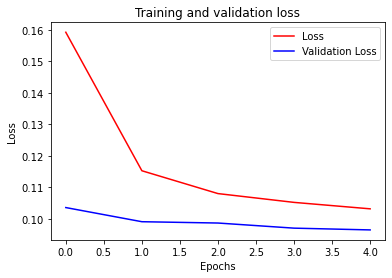

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [*range(5)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

In [215]:
from keras.models import load_model
model.save('model.h5')

In [218]:
import json
tokenizer_json = tokenizer.to_json() 
with open('tokenizer.json', 'w', encoding='utf-8') as f:  
      f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [62]:
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [214]:
with open("model.pkl", "wb") as lstm_model:
    pickle.dump(model,lstm_model)

INFO:tensorflow:Assets written to: ram://8b82aa42-fbc7-48c5-a13d-3361a7b08526/assets


INFO:tensorflow:Assets written to: ram://8b82aa42-fbc7-48c5-a13d-3361a7b08526/assets


In [212]:
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Testing the Model

In [64]:
X_test_pad[3]

array([4503,    2, 3516,   41,   13,   55,   34, 1778,    5, 8692,  169,
       1685,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [180]:
np.array(y_test)[3]

2

In [181]:
preds = model.predict(X_test_pad)

9672/9672 [==============================] - 473s 49ms/step


In [191]:
print('Original output for X_test[3]: ',np.array(y_test)[3])
tf.print('Predict output for X_test[3]: ',(tf.argmax(preds[3])))

Original output for X_test[3]:  2
Predict output for X_test[3]:  2


In [192]:
y_test.head(10)

699228    0
453523    1
583241    1
729364    2
899225    0
873548    2
167489    0
837683    0
402233    3
266434    0
Name: Label, dtype: int64

### using the model on a random tweet

In [205]:
text = 'iPhone 14 Pro Max on iOS 16.1 has been incredible'
text = clean_tweets(text)

<ipython-input-8-6b644176c028>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet)==np.float:


In [206]:
text = tokenizer.texts_to_sequences(text)
text_pad = pad_sequences(text,maxlen = max_length,padding = 'post')

In [207]:
text_pad

array([[  79,    0,    0, ...,    0,    0,    0],
       [1205,    0,    0, ...,    0,    0,    0],
       [1610,    0,    0, ...,    0,    0,    0],
       ...,
       [ 588,    0,    0, ...,    0,    0,    0],
       [1702,    0,    0, ...,    0,    0,    0],
       [ 236,    0,    0, ...,    0,    0,    0]])

In [208]:
another_text = np.array(text_pad)

In [209]:
another_text

array([[  79,    0,    0, ...,    0,    0,    0],
       [1205,    0,    0, ...,    0,    0,    0],
       [1610,    0,    0, ...,    0,    0,    0],
       ...,
       [ 588,    0,    0, ...,    0,    0,    0],
       [1702,    0,    0, ...,    0,    0,    0],
       [ 236,    0,    0, ...,    0,    0,    0]])

In [146]:
X_test.reset_index(drop=True)

0                                        where’s  need one?
1         said megan dead silent literally commit suicid...
2         baron taiga also good, again, time proven way ...
3         doc like “we want, it’s way easier husband get...
4                         oooh didn’t oracle score contract
                                ...                        
309487    here's look back incredible week 2022 kpmg wom...
309488    one reasons always advise people weak liver/ki...
309489    kudos pm setting example clean india , hurts p...
309490    little red riding hood sarada going grandma ts...
309491    yeah think week week much harder deal able bin...
Name: Text, Length: 309492, dtype: object

In [157]:
x=X_test.iloc[1:7]

In [173]:
X_test.iloc[1]
x=tf.expand_dims(X_test_pad[3],axis=-1)

In [168]:
x

<tf.Tensor: shape=(100, 1), dtype=int32, numpy=
array([[   77],
       [12010],
       [  683],
       [ 2988],
       [  278],
       [ 2417],
       [ 2758],
       [  197],
       [   19],
       [  875],
       [  784],
       [ 1458],
       [    2],
       [   13],
       [  140],
       [  357],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [

In [220]:
X_test.iloc[2]

'baron taiga also good, again, time proven way right wrong'

In [223]:
prediction_x = tf.argmax(tf.argmax(model.predict(tf.expand_dims(X_test_pad[2],axis=-1))))
print(prediction_x.numpy())

4/4 [==============================] - 0s 9ms/step
1


In [219]:
tf.print(tf.argmax(tf.argmax(model.predict(tf.expand_dims(X_test_pad[2],axis=-1)))))

4/4 [==============================] - 1s 30ms/step
1


In [210]:
tf.print(tf.argmax(tf.argmax(model.predict(another_text))))

2/2 [==============================] - 0s 74ms/step
2
